In [58]:
import pandas as pd
import numpy as np
import requests
from bs4 import BeautifulSoup
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [2]:
# Getting the html and parsing

def getAndParse(url):
    r = requests.get(url)
    html_content = r.content
    soup = BeautifulSoup(html_content,'html.parser')
    return soup

In [3]:
#getting links of all pages from start=1 to 50

start_from = list(range(1,1655,50))
PAGES = []


url1 = "https://www.imdb.com/search/title/?title_type=feature&num_votes=25000,&genres=action&sort=user_rating,desc&start="
url2 = "&ref_=adv_nxt"
html = getAndParse("https://www.imdb.com/search/title/?genres=action&sort=user_rating,desc&title_type=feature&num_votes=25000,&pf_rd_m=A2FGELUUNOQJNL&pf_rd_p=5aab685f-35eb-40f3-95f7-c53f09d542c3&pf_rd_r=BSQ0CNKW0HDSGXPKSMPX&pf_rd_s=right-6&pf_rd_t=15506&pf_rd_i=top&ref_=chttp_gnr_1")


for page_num in start_from:
    PAGES.append(url1+str(page_num)+url2)

In [4]:
for i in PAGES:
    print(i)
    print()

https://www.imdb.com/search/title/?title_type=feature&num_votes=25000,&genres=action&sort=user_rating,desc&start=1&ref_=adv_nxt

https://www.imdb.com/search/title/?title_type=feature&num_votes=25000,&genres=action&sort=user_rating,desc&start=51&ref_=adv_nxt

https://www.imdb.com/search/title/?title_type=feature&num_votes=25000,&genres=action&sort=user_rating,desc&start=101&ref_=adv_nxt

https://www.imdb.com/search/title/?title_type=feature&num_votes=25000,&genres=action&sort=user_rating,desc&start=151&ref_=adv_nxt

https://www.imdb.com/search/title/?title_type=feature&num_votes=25000,&genres=action&sort=user_rating,desc&start=201&ref_=adv_nxt

https://www.imdb.com/search/title/?title_type=feature&num_votes=25000,&genres=action&sort=user_rating,desc&start=251&ref_=adv_nxt

https://www.imdb.com/search/title/?title_type=feature&num_votes=25000,&genres=action&sort=user_rating,desc&start=301&ref_=adv_nxt

https://www.imdb.com/search/title/?title_type=feature&num_votes=25000,&genres=action&s

In [5]:
MOVIES = []

for page in PAGES[::]:
    html = getAndParse(page)    
    for div in html.findAll("div", {"class": "lister-item-content"}):
        for h3 in div.findAll("h3", {"class": "lister-item-header"}):
            for a in h3.findAll("a"):
                MOVIES.append("https://www.imdb.com"+a["href"])

In [6]:
len(MOVIES)

1655

In [68]:
FEATURES = []

for m in MOVIES[::]:
    movie = getAndParse(m)
    film_name = movie.find ("h1", {"data-testid": "hero-title-block__title"}).text
    imdb_rating = movie.find ('span', {'class':'sc-7ab21ed2-1'}).text
    director = movie.find ("a", {"class":"ipc-metadata-list-item__list-content-item ipc-metadata-list-item__list-content-item--link"}).text
    release_date = movie.find ("a", {"class":"ipc-link ipc-link--baseAlt ipc-link--inherit-color sc-8c396aa2-1 WIUyh"}).text
    runtime = movie.find ("li", {"data-testid":"title-techspec_runtime"}).text.replace("Runtime","").replace("hours", "h").replace("minutes","m")
    
    
    for div in movie.findAll("div", {"data-testid":"title-boxoffice-section"}):
        #Budget
        for li in div.findAll("li",{"data-testid":"title-boxoffice-budget"}):
            for span in li.findAll("span",{"class":"ipc-metadata-list-item__list-content-item"}) :
                budget = span.text
        #Gross
        for li2 in div.findAll("li",{"role":"presentation"}):
            for span2 in li2.findAll("span",{"class":"ipc-metadata-list-item__list-content-item"}) :
                gross = span2.text

    all_reviews = []
    for ul in movie.findAll("ul", {"data-testid":"reviewContent-all-reviews"}):
        for span in ul.findAll("span", {"class":"score"}):
            #print (span.text)
            all_reviews.append(span.text)
            
    user_reviews = all_reviews[0]
    critic_reviews = all_reviews[1]
    try:
        metascore = all_reviews[2]
    except IndexError :
        metascore = 0          
    

    FEATURES.append([film_name,imdb_rating,director,release_date,runtime,budget,gross,user_reviews,critic_reviews,metascore])
    
feature_columns= ["FILM", "IMDB RATING", "DIRECTOR", "RELEASE DATE", "RUN TIME","BUDGET","GROSS","USER REVIEWS","CRITIC REVIEWS","METASCORE"]
df1 = pd.DataFrame.from_records(FEATURES, columns=feature_columns)

ConnectionError: HTTPSConnectionPool(host='www.imdb.com', port=443): Max retries exceeded with url: /title/tt1259014/ (Caused by NewConnectionError('<urllib3.connection.HTTPSConnection object at 0x0000025A6D2BD8E0>: Failed to establish a new connection: [Errno 11001] getaddrinfo failed'))

In [41]:
df2 = df1.copy()
pd.set_option('display.max_rows', None)
df2

,FILM,IMDB RATING,DIRECTOR,RELEASE DATE,RUN TIME,BUDGET,GROSS,USER REVIEWS,CRITIC REVIEWS,METASCORE
0,The Dark Knight,9.0,Christopher Nolan,2008,2 h 32 m,"$185,000,000 (estimated)","$1,006,102,277",8.2K,441,84
1,The Lord of the Rings: The Return of the King,9.0,Peter Jackson,2003,3 h 21 m,"$94,000,000 (estimated)","$1,146,436,214",4K,343,94
2,Inception,8.8,Christopher Nolan,2010,2 h 28 m,"$160,000,000 (estimated)","$836,848,102",4.6K,483,74
3,The Lord of the Rings: The Two Towers,8.8,Peter Jackson,2002,2 h 59 m,"$94,000,000 (estimated)","$947,896,241",2.7K,317,87
4,The Lord of the Rings: The Fellowship of the Ring,8.8,Peter Jackson,2001,2 h 58 m,"$93,000,000 (estimated)","$898,094,742",5.6K,217,92
5,The Matrix,8.7,Lana Wachowski,1999,2 h 16 m,"$63,000,000 (estimated)","$467,222,728",4.8K,255,73
6,Star Wars: Episode V - The Empire Strikes Back,8.7,Irvin Kershner,1980,2 h 4 m,"$18,000,000 (estimated)","$538,375,067",1.4K,242,82
7,Karthikeya 2,8.6,Chandoo Mondeti,2022,2 h 30 m,"$18,000,000 (estimated)","$12,411",1K,3,0
8,Terminator 2: Judgment Day,8.6,James Cameron,1991,2 h 17 m,"$102,000,000 (estimated)","$520,881,154",1.4K,311,75
9,Star Wars,8.6,George Lucas,1977,2 h 1 minute,"$11,000,000 (estimated)","$775,398,007",2K,214,90


In [42]:
# Budget 
def convert_budget(budget):
    i = budget
    i = i.split(' ')[0]
    if '$' in i:
        i = i.split('$')[-1].replace(',','')
        return(float(i))
        
    elif '¥' in i:
        i = i.split('¥')[-1].replace(',','')
        i = float(i)*0.0073
        return(i)
        
    elif '₹' in i:
        i = i.split('₹')[-1].replace(',','')
        i = float(i)*0.0125
        return(i)
        
    elif 'FRF' in i:
        i = i.split('FRF')[-1].replace(',','').strip()
        i = float(i)*0.1513  
        return(i)
        
    elif 'TRL' in i:
        i = i.split('TRL')[-1].replace(',','').strip()
        i = float(i)*0.06  
        return(i)
    
    elif '£' in i:
        i = i.split('£')[-1].replace(',','')
        i = float(i)*1.18  
        return(i)
        
    elif 'MVR' in i:
        i = i.split('MVR')[-1].replace(',','').strip()
        i = float(i)*0.06  
        return(i)
        
    elif 'DEM' in i:
        i = i.split('DEM')[-1].replace(',','').strip()
        i = float(i)*0.99  
        return(i)
        
    elif '₩' in i:
        i = i.split('₩')[-1].replace(',','')
        i = float(i)*0.00074  
        return(i)
        
    elif 'PKR' in i:
        i = i.split('PKR')[-1].replace(',','').strip()
        i = float(i)*0.0046  
        return(i)
        
    elif 'NOK' in i:
        i = i.split('NOK')[-1].replace(',','').strip()
        i = float(i)*0.10  
        return(i)
        
    elif 'CN¥' in i:
        i = i.split('CN¥')[-1].replace(',','')
        i = float(i)*0.1459 
        return(i)
        
    else:
        return ('let me know')
    
    
# Gross
def convert_gross(gross):
    i = gross
    i = i.split(' ')[0]
    i = i.split('$')[-1].replace(',','')
    return(float(i))

# User Review
def convert_userReview(value):
    if 'K' in value:
        value = value.split('K')[0]
        value = float(value)*1000
        return value
    else:
        return float(value)

In [43]:
# Data Cleaning
df2['FILM'] = df2['FILM'].astype('string')
df2['IMDB RATING'] = df2['IMDB RATING'].astype(float)
df2['DIRECTOR'] = df2['DIRECTOR'].astype('string')
df2['RELEASE DATE'] = df2['RELEASE DATE'].astype(int)
df2['RUN TIME'] = [text.split(' ') for text in df2['RUN TIME']]
df2['RUN TIME'] = [int(text[0])*60 + int(text[-2]) for text in df2['RUN TIME']]
df2['BUDGET'] = df2['BUDGET'].apply(convert_budget)
df2['GROSS'] = df2['GROSS'].apply(convert_gross)
df2['USER REVIEWS'] = df2['USER REVIEWS'].apply(convert_userReview)
df2['CRITIC REVIEWS'] = df2['CRITIC REVIEWS'].astype(float)
df2['METASCORE'] = df2['METASCORE'].astype(float)

In [44]:
df2

,FILM,IMDB RATING,DIRECTOR,RELEASE DATE,RUN TIME,BUDGET,GROSS,USER REVIEWS,CRITIC REVIEWS,METASCORE
0,The Dark Knight,9.0,Christopher Nolan,2008,152,185000000.0,1.006102e+09,8200.0,441.0,84.0
1,The Lord of the Rings: The Return of the King,9.0,Peter Jackson,2003,201,94000000.0,1.146436e+09,4000.0,343.0,94.0
2,Inception,8.8,Christopher Nolan,2010,148,160000000.0,8.368481e+08,4600.0,483.0,74.0
3,The Lord of the Rings: The Two Towers,8.8,Peter Jackson,2002,179,94000000.0,9.478962e+08,2700.0,317.0,87.0
4,The Lord of the Rings: The Fellowship of the Ring,8.8,Peter Jackson,2001,178,93000000.0,8.980947e+08,5600.0,217.0,92.0
5,The Matrix,8.7,Lana Wachowski,1999,136,63000000.0,4.672227e+08,4800.0,255.0,73.0
6,Star Wars: Episode V - The Empire Strikes Back,8.7,Irvin Kershner,1980,124,18000000.0,5.383751e+08,1400.0,242.0,82.0
7,Karthikeya 2,8.6,Chandoo Mondeti,2022,150,18000000.0,1.241100e+04,1000.0,3.0,0.0
8,Terminator 2: Judgment Day,8.6,James Cameron,1991,137,102000000.0,5.208812e+08,1400.0,311.0,75.0
9,Star Wars,8.6,George Lucas,1977,121,11000000.0,7.753980e+08,2000.0,214.0,90.0


In [45]:
# checking for blank values
df2.isna().sum()

FILM              0
IMDB RATING       0
DIRECTOR          0
RELEASE DATE      0
RUN TIME          0
BUDGET            0
GROSS             0
USER REVIEWS      0
CRITIC REVIEWS    0
METASCORE         0
dtype: int64

In [46]:
df2.drop(columns=['FILM','DIRECTOR'],inplace=True)

In [47]:
df2

,IMDB RATING,RELEASE DATE,RUN TIME,BUDGET,GROSS,USER REVIEWS,CRITIC REVIEWS,METASCORE
0,9.0,2008,152,185000000.0,1.006102e+09,8200.0,441.0,84.0
1,9.0,2003,201,94000000.0,1.146436e+09,4000.0,343.0,94.0
2,8.8,2010,148,160000000.0,8.368481e+08,4600.0,483.0,74.0
3,8.8,2002,179,94000000.0,9.478962e+08,2700.0,317.0,87.0
4,8.8,2001,178,93000000.0,8.980947e+08,5600.0,217.0,92.0
5,8.7,1999,136,63000000.0,4.672227e+08,4800.0,255.0,73.0
6,8.7,1980,124,18000000.0,5.383751e+08,1400.0,242.0,82.0
7,8.6,2022,150,18000000.0,1.241100e+04,1000.0,3.0,0.0
8,8.6,1991,137,102000000.0,5.208812e+08,1400.0,311.0,75.0
9,8.6,1977,121,11000000.0,7.753980e+08,2000.0,214.0,90.0


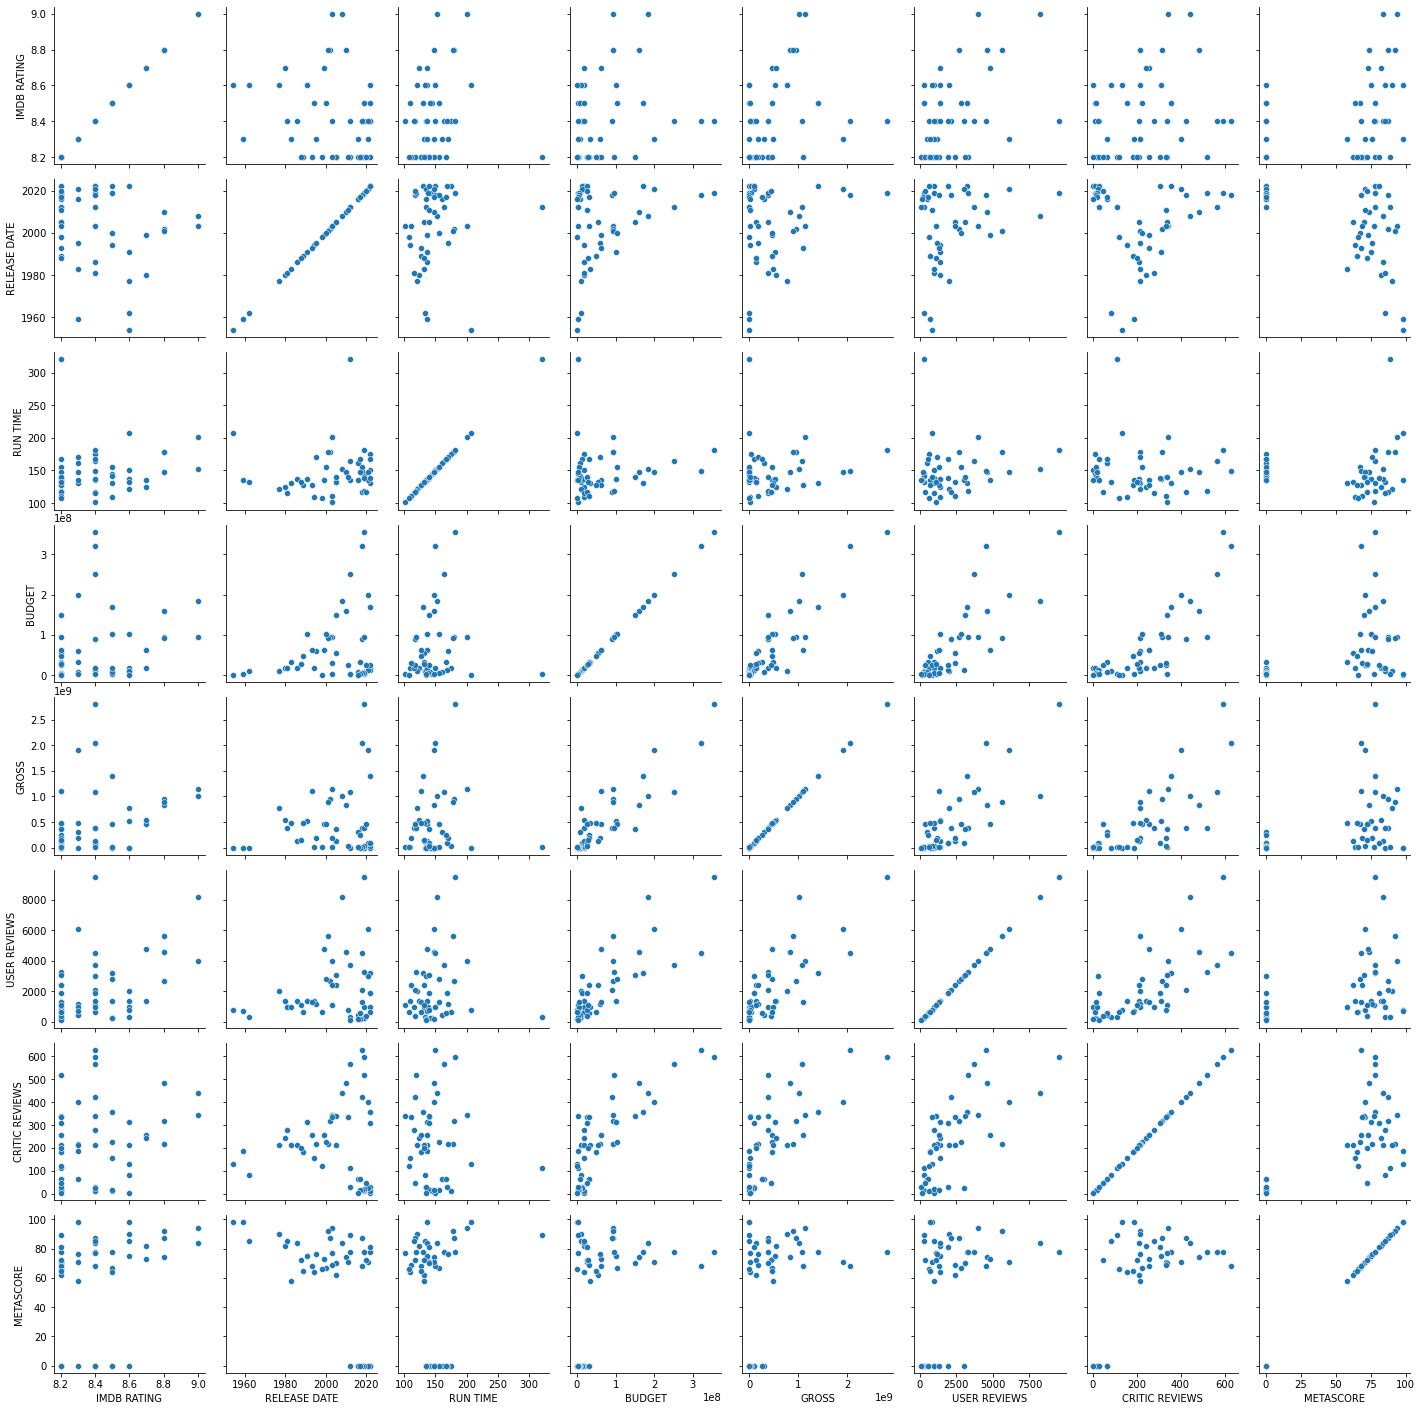

In [50]:
g = sns.PairGrid(df2)
g.map(sns.scatterplot)
plt.show()

In [49]:
df2.corr()

,IMDB RATING,RELEASE DATE,RUN TIME,BUDGET,GROSS,USER REVIEWS,CRITIC REVIEWS,METASCORE
IMDB RATING,1.000000,-0.209358,0.157611,0.239903,0.293962,0.455795,0.233766,0.310554
RELEASE DATE,-0.209358,1.000000,0.096866,0.249287,0.157982,0.206618,0.009296,-0.544855
RUN TIME,0.157611,0.096866,1.000000,0.109775,0.104771,0.107642,-0.063144,0.039174
BUDGET,0.239903,0.249287,0.109775,1.000000,0.891964,0.819642,0.814547,0.343753
GROSS,0.293962,0.157982,0.104771,0.891964,1.000000,0.791422,0.716134,0.368765
USER REVIEWS,0.455795,0.206618,0.107642,0.819642,0.791422,1.000000,0.702999,0.364971
CRITIC REVIEWS,0.233766,0.009296,-0.063144,0.814547,0.716134,0.702999,1.000000,0.666826
METASCORE,0.310554,-0.544855,0.039174,0.343753,0.368765,0.364971,0.666826,1.000000


In [34]:
df2.dtypes

IMDB RATING       float64
RELEASE DATE        int32
RUN TIME            int64
BUDGET            float64
GROSS             float64
USER REVIEWS       object
CRITIC REVIEWS     object
METASCORE          object
dtype: object

In [63]:
df2["POLY_METASCORE"] = df2['METASCORE']**2
df2["GR_X_REV"] = df2['CRITIC REVIEWS']* df2['GROSS']

In [64]:
LR = LinearRegression()
x = df2.drop(columns=['IMDB RATING'])
y = df2['IMDB RATING']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=10)
LR.fit(x_train,y_train)
prediction = LR.predict(x_test)
LR.score(x_test, y_test)
MSE = np.mean((prediction - y_test)**2)
MSE

0.04653695516253299